# Missing $E_T$

The missing energy is, from a technical point of view, funny in two respects:

* It depends on pretty much all other objects in the event. So if you apply a correction to another object, you are forced to recalculate the Messing $E_T$.
* It is stored as a collection of Missing $E_T$ objects. But, in reality, you are only ever interested in one of them.

In [1]:
from func_adl_servicex_xaodr21 import SXDSAtlasxAODR21
import matplotlib.pyplot as plt
from config import rucio_zee_r21_mc

In [2]:
ds = SXDSAtlasxAODR21(rucio_zee_r21_mc, backend='dev_xaod')

We grab the first Missing $E_T$ item in the collection, as is usual for the `MET_Truth` bank here. Since `func_adl` works in terms of sequences, not arrays, we do this by picking off the `First` item.

In [3]:
events = (ds
          .Select(lambda e: e.MissingET("MET_Truth").First().met()/1000.0)
          .AsAwkwardArray('met')
          .value())

rucio://mc15_13TeV:m...:   0%|          | 0/9000000000.0 [00:00]

        rucio://mc15_13TeV:m... Downloaded:   0%|          | 0/9000000000.0 [00:00]

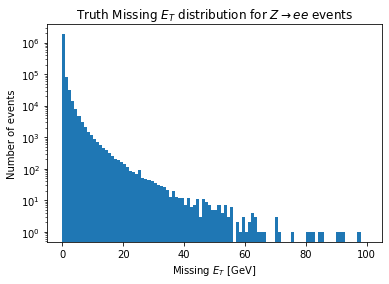

In [4]:
plt.hist(events.met, bins=100, range=(0, 100))
plt.xlabel('Missing $E_T$ [GeV]')
plt.ylabel('Number of events')
plt.yscale('log')
_ = plt.title('Truth Missing $E_T$ distribution for $Z\\rightarrow ee$ events')

## The Datamodel

The data model when this documentation was last built was:

In [5]:
from func_adl_servicex_xaodr21.xAOD.missinget_v1 import MissingET_v1
help(MissingET_v1)

Help on class MissingET_v1 in module func_adl_servicex_xaodr21.xAOD.missinget_v1:

class MissingET_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  met(self) -> float
 |      A method
 |  
 |  mpx(self) -> float
 |      A method
 |  
 |  mpy(self) -> float
 |      A method
 |  
 |  phi(self) -> float
 |      A method
 |  
 |  sumet(self) -> float
 |      A method
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## Further Information

* The [`xAOD::MissingET_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODMissingET/xAODMissingET/versions/MissingET_v1.h) with all the inline documentation.
* [Slides from a tutorial](https://indico.cern.ch/event/860971/contributions/3626404/attachments/1974159/3285070/met_200122.pdf) on Missing ET